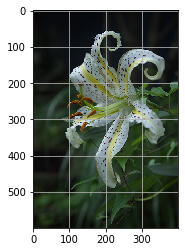

In [69]:
from PIL import Image
import numpy as np
from urllib.request import urlopen
from matplotlib import pyplot as plt

im = Image.open('sample2.png')
# im

#Use to find ref point
temp = plt.imread('sample2.png')
plt.grid()
plt.imshow(temp)

In [70]:
data = np.asarray(im)
data.shape
#should print out (.., .., 3)
#if 4 is printed out instead of 3, there exists an alpha channel

(600, 400, 3)

In [71]:
#Choose area or space on the image as a gray reference point
refpos = (140,150) # reference position
refsize = (25,25) # reference sample size

sub = data[refpos[0]:refpos[0]+refsize[0],refpos[1]:refpos[1]+refsize[1]] #use this when alpha channel does not exist originally
# sub = data[refpos[0]:refpos[0]+refsize[0],refpos[1]:refpos[1]+refsize[1]][:, :, :3] #use this when alpha channel does exist
Image.fromarray(sub)

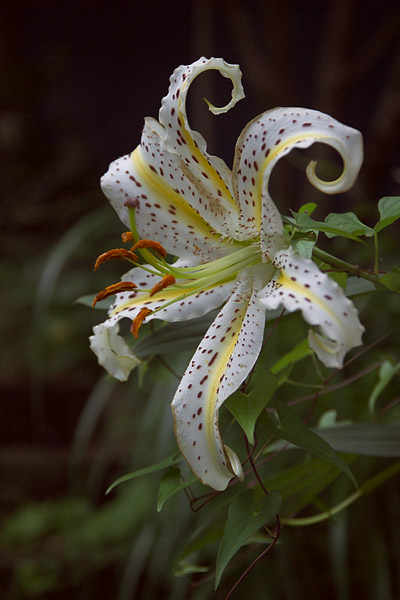

In [72]:
# Conversion functions courtesy of https://stackoverflow.com/a/34913974/2721685
def rgb2ycbcr(im):
    xform = np.array([[.299, .587, .114], [-.1687, -.3313, .5], [.5, -.4187, -.0813]])
    ycbcr = im.dot(xform.T)
    ycbcr[:,:,[1,2]] += 128
    return ycbcr #np.uint8(ycbcr)

def ycbcr2rgb(im):
    xform = np.array([[1, 0, 1.402], [1, -0.34414, -.71414], [1, 1.772, 0]])
    rgb = im.astype(np.float)
    rgb[:,:,[1,2]] -= 128
    rgb = rgb.dot(xform.T)
    np.putmask(rgb, rgb > 255, 255)
    np.putmask(rgb, rgb < 0, 0)
    return np.uint8(rgb)

# Convert data and sample to YCbCr
ycbcr = rgb2ycbcr(data)
ysub = rgb2ycbcr(sub)

# Calculate mean components
yc = list(np.mean(ysub[:,:,i]) for i in range(3))

# Center cb and cr components of image based on sample
for i in range(1,3):
    ycbcr[:,:,i] = np.clip(ycbcr[:,:,i] + (128-yc[i]), 0, 255)

rgb = ycbcr2rgb(ycbcr) # Convert back
# Image.fromarray(rgb).save('sample2_test.png') #uncomment to save the image
Image.fromarray(rgb)